<a href="https://colab.research.google.com/github/miguelrendon107/Analitica/blob/main/Trabajo_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TRABAJO FINAL.

Por Miguel Rendón, Juan José Gallón y Luciano Saldarriaga



## LIBRERIAS, DATOS Y CORRELACIÓN

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt #Graficador
import seaborn as sns
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans
from sklearn.tree import export_graphviz
from pydotplus import graph_from_dot_data

In [ ]:
bd= "/content/bankruptcy 2.xlsx"
bd= pd.read_excel(bd, sheet_name=1); bd.head(); bd=bd.dropna()

##AQUI SE DETERMINARON CUALES FUERON LAS 6 VARIABLES CON MAYOR CORRELACION CON LA VARIABLE BANKRUPT PARA HACER UN MEJOR ANALISIS##
# Calcular la matriz de correlación
corr= bd.corr()

# Filtrar la columna de correlación con la variable "Bankrupt"
corrbankrupt= corr['Bankrupt']

# Ordenar las variables por su valor absoluto de correlación de forma descendente
corrbankrupt= corrbankrupt.abs().sort_values(ascending=False)

# Mostrar las primeras 7 variables más correlacionadas con "Bankrupt"
print("Correlaciones alternativa 2:", corrbankrupt.head(7))


Correlaciones alternativa 2: Bankrupt                                     1.000000
 Current Liability to Assets                 0.624348
 Debt ratio %                                0.616173
 Net worth/Assets                            0.616173
 Per Share Net profit before tax (Yuan ¥)    0.565243
 Persistent EPS in the Last Four Seasons     0.564817
 Total income/Total expense                  0.564367
Name: Bankrupt, dtype: float64


In [ ]:
# Para el árbol de decisión y K-means
bdx = np.array(bd[[' Current Liability to Assets', ' Debt ratio %', ' Net worth/Assets',
                   ' Per Share Net profit before tax (Yuan ¥)', ' Persistent EPS in the Last Four Seasons',
                   ' Total income/Total expense']])
bdy = np.array(bd['Bankrupt'])

# Para el modelo Naive Bayes
dx = bd[[' Current Liability to Assets', ' Debt ratio %', ' Net worth/Assets',
         ' Per Share Net profit before tax (Yuan ¥)', ' Persistent EPS in the Last Four Seasons',
         ' Total income/Total expense', 'Bankrupt']]
dx = dx.dropna()

Esta es la matriz de la correlacion:
                                             Current Liability to Assets  \
 Current Liability to Assets                                   1.000000   
 Debt ratio %                                                  0.791089   
 Net worth/Assets                                             -0.791089   
 Per Share Net profit before tax (Yuan ¥)                     -0.581511   
 Persistent EPS in the Last Four Seasons                      -0.562986   
 Total income/Total expense                                   -0.473775   
Bankrupt                                                       0.624348   

                                            Debt ratio %   Net worth/Assets  \
 Current Liability to Assets                    0.791089          -0.791089   
 Debt ratio %                                   1.000000          -1.000000   
 Net worth/Assets                              -1.000000           1.000000   
 Per Share Net profit before tax (Yuan ¥)    

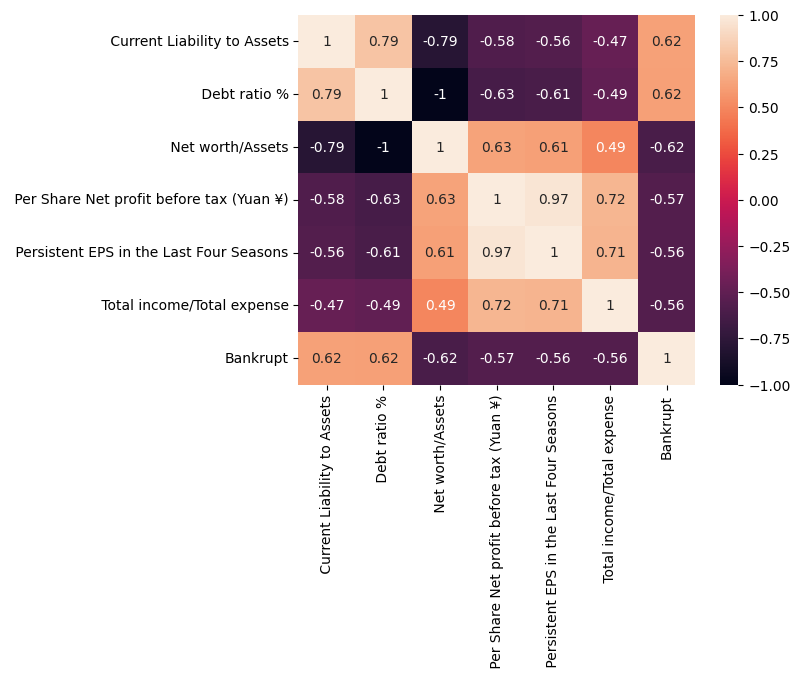

In [ ]:
corr2= dx.corr()
print("Esta es la matriz de la correlacion:\n", corr2)
sns.heatmap(corr2, annot=True)
plt.show()

## 1. MODELO NAIVE BAYES

In [ ]:
##MODELO DE NAIVE BAYES##
##bd[[' Current Liability to Assets', ' Debt ratio %', ' Net worth/Assets', ' Per Share Net profit before tax (Yuan ¥)', ' Persistent EPS in the Last Four Seasons', ' Total income/Total expense', 'Bankrupt']]
dx= dx.dropna()
np.set_printoptions(suppress=True, precision=5)
mnb= GaussianNB()
#Entrenamiento del modelo
mnb.fit(bdx,bdy)
#Predicción de los datos de entrenamiento
ydp= mnb.predict(bdx)

u=mnb.theta_ #se estiman las medias
sigma=np.sqrt(mnb.var_) #se estiman las varianzas
print("Las Medias son:\n", u)
print("Las Varianzas son:\n", sigma)

##INTERVALOS VARIABLES##

LI= u-sigma #Limite inferior
LS= u+sigma #Limite superior
print("Los Limites inferiores son:\n", LI)
print("Los Limites superiores son:\n", LS)

##MATRIZ DE CONFUSIÓN PARA EL MODELO DE NAIVE BAYES##
cm= confusion_matrix(bdy, ydp)
print("Esta es la matriz de confusión para el modelo de Naive Bayes:\n", cm)

VN= cm[0,0]; FP= cm[0,1]; FN= cm[1,0]; VP= cm[1,1]

##METRICAS##
print("Exactitud=", round((VP+VN)/(VP+VN+FP+FN)*100, 2), '%')
print("Sensibilidad=", round(VP/(VP+FN)*100, 2), '%')
print("Especificidad=", round(VN/(VN+FP)*100, 2), '%')

Las Medias son:
 [[0.0687  0.11101 0.88899 0.17685 0.22078 0.00234]
 [0.14424 0.18705 0.81295 0.14777 0.18882 0.00208]]
Las Varianzas son:
 [[0.03368 0.03969 0.03969 0.01135 0.01232 0.0002 ]
 [0.05772 0.05611 0.05611 0.02778 0.03064 0.00018]]
Los Limites inferiores son:
 [[0.03502 0.07132 0.8493  0.1655  0.20847 0.00214]
 [0.08652 0.13094 0.75685 0.11998 0.15818 0.0019 ]]
Los Limites superiores son:
 [[0.10238 0.1507  0.92868 0.1882  0.2331  0.00254]
 [0.20196 0.24315 0.86906 0.17555 0.21946 0.00226]]
Esta es la matriz de confusión para el modelo de Naive Bayes:
 [[200  20]
 [ 38 182]]
Exactitud= 86.82 %
Sensibilidad= 82.73 %
Especificidad= 90.91 %


In [ ]:
# Datos de las nuevas empresas
empresas_nuevas = [
    [0.07, 0.10, 0.90, 0.18, 0.23, 0.002],  # Empresa 1
    [0.12, 0.18, 0.82, 0.16, 0.20, 0.001]]   # Empresa 2

# Predicción para las nuevas empresas
predicciones = mnb.predict(empresas_nuevas)

# Obtener las probabilidades de las predicciones
probabilidades = mnb.predict_proba(empresas_nuevas)

# Imprimir los resultados de las predicciones
for i, prediccion in enumerate(predicciones):
    print(f"Empresa {i+1} - Predicción: {'No Quiebra' if prediccion == 0 else 'Quiebra'}")
    print(f"Probabilidades: No Quiebra = {probabilidades[i][0]:.2f}, Quiebra = {probabilidades[i][1]:.2f}")

Empresa 1 - Predicción: No Quiebra
Probabilidades: No Quiebra = 1.00, Quiebra = 0.00
Empresa 2 - Predicción: Quiebra
Probabilidades: No Quiebra = 0.00, Quiebra = 1.00


## 2. ARBOL DE DECISIÓN

In [ ]:
mar= DecisionTreeClassifier(criterion='gini', max_depth=4) #4 niveles o variables de entrada
mar.fit(bdx,bdy)
ydp= mar.predict(bdx)

from sklearn.metrics import confusion_matrix
cm= confusion_matrix(bdy, ydp)
print("Esta es la matriz de confusión para el modelo de Árbol de Decisión:\n", cm)
#   0  1
# 0 VN FP
# 1 FN VP
#EVALUAMOS EL MODELO
VN= cm[0,0]; FP= cm[0,1]; FN= cm[1,0]; VP= cm[1,1]

print("Exactitud=", round((VP+VN)/(VP+VN+FP+FN)*100, 2), '%')
print("Sensibilidad=", round(VP/(VP+FN)*100, 2), '%')
print("Especificidad=", round(VN/(VN+FP)*100, 2), '%')

from sklearn.tree import export_graphviz
from pydotplus import graph_from_dot_data

vs = [' Current Liability to Assets', ' Debt ratio %', ' Net worth/Assets',
      ' Per Share Net profit before tax (Yuan ¥)', ' Persistent EPS in the Last Four Seasons',
      ' Total income/Total expense']
dot_graph= export_graphviz (mar, feature_names=vs)
graph= graph_from_dot_data(dot_graph)
graph.write_png("Arbol Igualado.png")

Esta es la matriz de confusión para el modelo de Árbol de Decisión:
 [[210  10]
 [ 18 202]]
Exactitud= 93.64 %
Sensibilidad= 91.82 %
Especificidad= 95.45 %


True

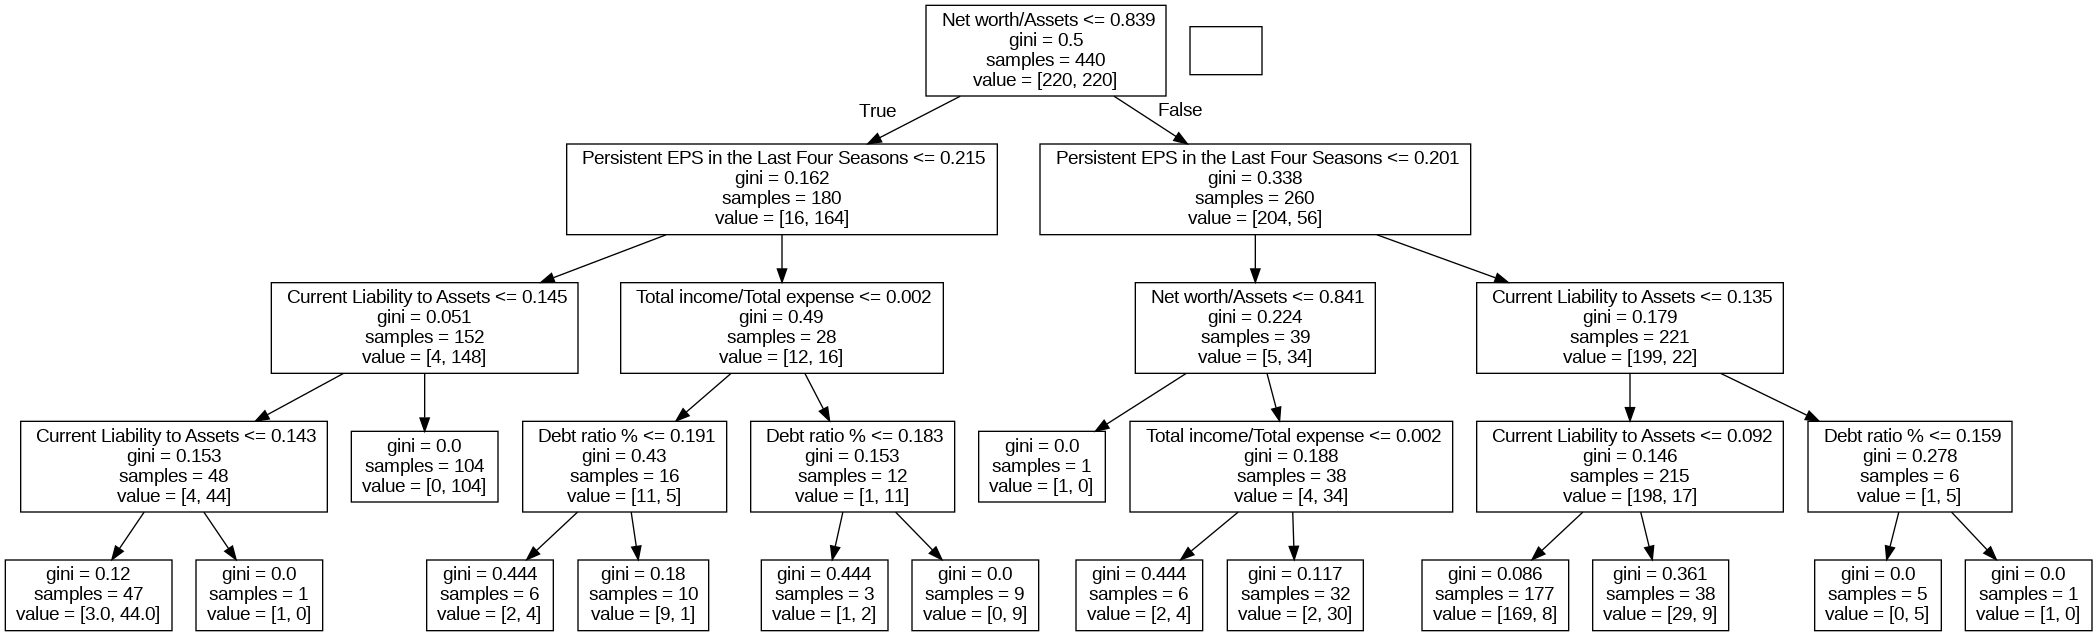

Nuevas empresas:

1. La primera empresa termina en el nodo [169,8] lo que sugiere que tiene un 95% de probabilidades de que no se quiebre.

Current Liability to Assets <= 0.092; Persisten EPS in the last Four Seasons > 0.202;                                                        Net worth/Assets > 0.839

2. La segunda empresa termina en el nodo [3, 44] lo que sguiere que tiene un 93,6% de probabilidades de que la empresa se quiebre.

Net worth/Assets <= 0.839; Persistent EPS in the Last Four Seasons <= 0.215;                                          Current Liability to Assets <= 0.143

## 3. MODEO K-MEANS

In [ ]:
##MODELO K-MEANS##
np.random.seed (42)

mkm=KMeans(n_clusters=6, init= 'random', random_state=42) #se hace mejor con 5 cluster
mkm.fit(bdx, bdy)
labels=mkm.labels_
plt.show()


################
##CANTIDAD DE EMPRESAS QUE BANKRUPT (0 & 1)##

# Cluster 0
c0 = len(np.where((labels == 0) & (bdy == 0))[0])
c01 = len(np.where((labels == 0) & (bdy == 1))[0])

print("Cantidad de empresas que no se quiebran en el cluster 0:",c0)
print("El porcentaje de que las empresas no se quiebren en el cluster 0:", round(c0 / (c0 + c01) * 100, 2), '%')
print("Cantidad de empresas que se quiebran en el cluster 0:",c01)

# Cluster 1
c10 = len(np.where((labels == 1) & (bdy == 0))[0])
c11 = len(np.where((labels == 1) & (bdy == 1))[0])

print("Cantidad de empresas que no se quiebran en el cluster 1:",c10)
print("El porcentaje de que las empresas no se quiebren en el cluster 1:", round(c10 / (c10 + c11) * 100, 2), '%')
print("Cantidad de empresas que se quiebran en el cluster 1:",c11)

# Cluster 2
c20 = len(np.where((labels == 2) & (bdy == 0))[0])
c21 = len(np.where((labels == 2) & (bdy == 1))[0])

print("Cantidad de empresas que no se quiebran en el cluster 2:",c20)
print("El porcentaje de que las empresas no se quiebren en el cluster 2:", round(c20 / (c20 + c21) * 100, 2), '%')
print("Cantidad de empresas que se quiebran en el cluster 2:",c21)

# Cluster 3
c30 = len(np.where((labels == 3) & (bdy == 0))[0])
c31 = len(np.where((labels == 3) & (bdy == 1))[0])

print("Cantidad de empresas que no se quiebran en el cluster 3:",c30)
print("El porcentaje de que las empresas no se quiebren en el cluster 3:", round(c30 / (c30 + c31) * 100, 2), '%')
print("Cantidad de empresas que se quiebran en el cluster 3:",c31)

#Cluster 4
c40 = len(np.where((labels == 4) & (bdy == 0))[0])
c41 = len(np.where((labels == 4) & (bdy == 1))[0])

print("Cantidad de empresas que no se quiebran en el cluster 4:",c40)
print("El porcentaje de que las empresas no se quiebren en el cluster 4:", round(c40 / (c40 + c41) * 100, 2), '%')
print("Cantidad de empresas que se quiebran en el cluster 4:",c41)

#Cluster 5
c50 = len(np.where((labels == 5) & (bdy == 0))[0])
c51 = len(np.where((labels == 5) & (bdy == 1))[0])

print("Cantidad de empresas que se quiebran en el cluster 5:",c51)
print("El porcentaje de que las empresas no se quiebren en el cluster 5:", round(c51 / (c50 + c51) * 100, 2), '%')
print("Cantidad de empresas que no se quiebran en el cluster 5:",c50)

#########################
##CLUSTER MAYOR##
##bd[[' Current Liability to Assets', ' Debt ratio %', ' Net worth/Assets',
##    ' Per Share Net profit before tax (Yuan ¥)', ' Persistent EPS in the Last Four Seasons',
##    ' Total income/Total expense', 'Bankrupt']]

clusters = mkm.cluster_centers_
clusters = np.round(clusters, 2) #redondear a dos decimales
print("Esta es la característica sociodemográfica de cada cluster:\n", clusters)

# Variable Current Liability to Assets
maxcla = np.argmax(clusters[:, 0])
print("El cluster con mayor proporción de pasivos corrientes sobre los activos totales es:", maxcla)

# Variable Debt ratio %
maxdr = np.argmax(clusters[:, 1])
print("El cluster con mayor proporción de la deuda sobre los activos es:", maxdr)

# Variable Net worth/Assets
maxnw = np.argmax(clusters[:, 2])
print("El cluster con mayor proporción de activos financiados por patrimonio neto es:", maxnw)

# Variable Per Share Net profit before tax (Yuan ¥)
maxpsnp = np.argmax(clusters[:, 3])
print("El cluster con mayor ganancia por acción antes de impuestos es:", maxpsnp)

# Variable Persistent EPS in the Last Four Seasons
maxpe = np.argmax(clusters[:, 4])
print("El cluster con mayores ganancias por acción sostenidas durante los últimos cuatro trimestres es:", maxpe)

# Variable Total income/Total expense
maxtie = np.argmax(clusters[:, 5])
print("El cluster con mayor proporción de ingresos sobre gastos totales es:", maxtie)

Cantidad de empresas que no se quiebran en el cluster 0: 0
El porcentaje de que las empresas no se quiebren en el cluster 0: 0.0 %
Cantidad de empresas que se quiebran en el cluster 0: 20
Cantidad de empresas que no se quiebran en el cluster 1: 45
El porcentaje de que las empresas no se quiebren en el cluster 1: 88.24 %
Cantidad de empresas que se quiebran en el cluster 1: 6
Cantidad de empresas que no se quiebran en el cluster 2: 17
El porcentaje de que las empresas no se quiebren en el cluster 2: 19.54 %
Cantidad de empresas que se quiebran en el cluster 2: 70
Cantidad de empresas que no se quiebran en el cluster 3: 100
El porcentaje de que las empresas no se quiebren en el cluster 3: 89.29 %
Cantidad de empresas que se quiebran en el cluster 3: 12
Cantidad de empresas que no se quiebran en el cluster 4: 57
El porcentaje de que las empresas no se quiebren en el cluster 4: 59.38 %
Cantidad de empresas que se quiebran en el cluster 4: 39
Cantidad de empresas que se quiebran en el clust

### Nuevas Empresas

La empresa 1 queda en el cluster: [3]


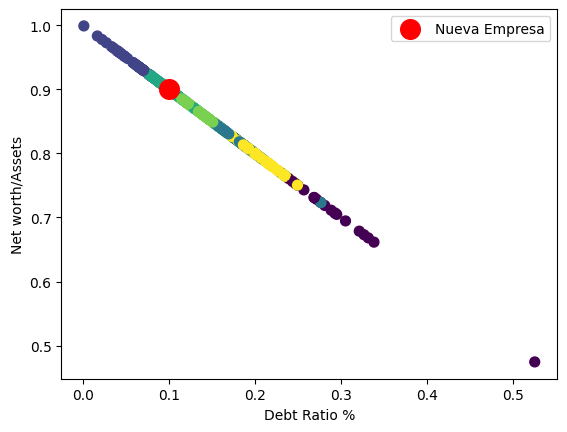

In [ ]:
#' Current Liability to Assets', ' Debt ratio %', ' Net worth/Assets',
#                   ' Per Share Net profit before tax (Yuan ¥)', ' Persistent EPS in the Last Four Seasons',
 #                  ' Total income/Total expense'


######## NUEVA EMPRESA 1 ###############
xd2= np.array([[0.07, 0.10, 0.90, 0.18, 0.23, 0.002]])
ydp2= mkm.predict(xd2)
print('La empresa 1 queda en el cluster:', ydp2)

#LA GRAFICA CON LAS VARIABLES DE MAYOR CORRELACION ENTRE ELLAS
plt.scatter(bdx[:,1], bdx [:,2],c=labels, s=50, cmap="viridis")
plt.scatter(xd2 [:,1], xd2 [: ,2], marker='o', s=200, facecolors= 'Red',label='Nueva Empresa')
plt.xlabel("Debt Ratio %"); plt.ylabel("Net worth/Assets");plt.legend()
plt.show()

La empresa 2 queda en el cluster: [2]


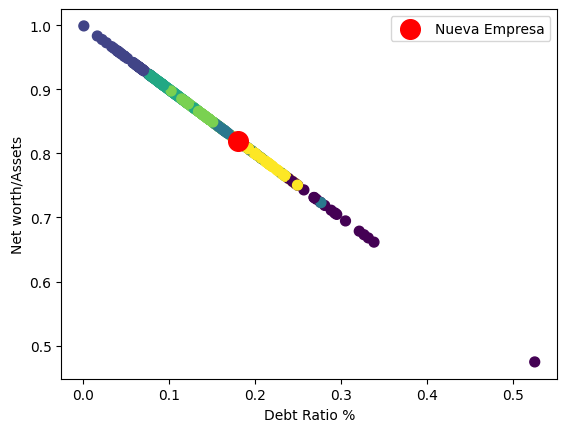

In [ ]:
##### NUEVA EMPRESA 2#####
xd3= np.array([[0.12, 0.18, 0.82, 0.16, 0.20, 0.001]])
ydp3= mkm.predict(xd3)
print('La empresa 2 queda en el cluster:', ydp3)

plt.scatter(bdx[:,1], bdx [:,2],c=labels, s=50, cmap="viridis")
plt.scatter(xd3 [:,1], xd3 [: ,2], marker='o', s=200, facecolors= 'Red',label='Nueva Empresa')
plt.xlabel("Debt Ratio %"); plt.ylabel("Net worth/Assets");plt.legend()
plt.show()